In [16]:
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from datset import FacesDataset
import numpy as np
import pandas as pd
import torch

model = torch.load('model.pth').double()
model

train_df = pd.read_csv("training.csv")

conds = np.where((train_df.isnull().sum(axis=0) < 100))
train_df = train_df.iloc[:, conds[0]]
train_df = train_df.dropna(axis=0)
traindataset = FacesDataset(train_df.iloc[:500])
traindataloader = DataLoader(traindataset, batch_size=64, shuffle=False, num_workers=2)

def show_datapoint(image, label):
    l = label.reshape(4, 2)
    X = l[:, 0]
    Y = l[:, 1]
    plt.imshow(image.reshape(96,96), cmap='Greys')
    plt.scatter(X, Y, c='black')
    plt.show()

iterator = iter(traindataloader)
images, labels = next(iterator)

output = model(images[10].double().unsqueeze(dim=0)).detach()

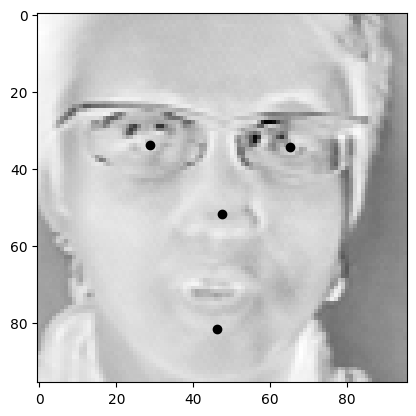

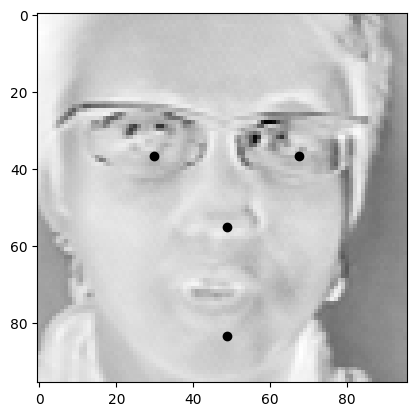

In [17]:
output.shape
show_datapoint(images[10], labels[10])
show_datapoint(images[10], output)